In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from xgboost import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('dataTurism.csv')

In [3]:
df.isna().sum()

Регион                                                                            0
Год                                                                               0
Доходы гостиниц и аналогичных средств размещения                                100
Число гостиниц и средств размещения                                             100
Численность размещенных лиц в гостиницах и ананлогичных средствах размещения    100
Число ночевок в гостиницах и ананлогичных средствах размещения                  100
Средняя численность работников, включая внешних совместителей                    66
Число туристских фирм                                                            10
Средства, поступившие от реализации туристкого продукта                         114
Число реализованных турпакетов населению                                        101
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 10 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Регион                                                                        238 non-null    object 
 1   Год                                                                           238 non-null    int64  
 2   Доходы гостиниц и аналогичных средств размещения                              138 non-null    float64
 3   Число гостиниц и средств размещения                                           138 non-null    float64
 4   Численность размещенных лиц в гостиницах и ананлогичных средствах размещения  138 non-null    float64
 5   Число ночевок в гостиницах и ананлогичных средствах размещения                138 non-null    float64
 6   Средняя численность работников, вк

In [5]:
df = df.dropna(subset=['Средняя численность работников, включая внешних совместителей'])

In [6]:
df.isna().sum()

Регион                                                                            0
Год                                                                               0
Доходы гостиниц и аналогичных средств размещения                                 91
Число гостиниц и средств размещения                                              91
Численность размещенных лиц в гостиницах и ананлогичных средствах размещения     91
Число ночевок в гостиницах и ананлогичных средствах размещения                   91
Средняя численность работников, включая внешних совместителей                     0
Число туристских фирм                                                             0
Средства, поступившие от реализации туристкого продукта                         104
Число реализованных турпакетов населению                                         91
dtype: int64

In [7]:
print(len(df['Регион'].unique()))

14


In [8]:
df = pd.get_dummies(df, columns=['Регион'], prefix=['Регион'])

In [9]:
df.head()

Год  Доходы гостиниц и аналогичных средств размещения  \
0  2002                                               NaN   
1  2004                                               NaN   
2  2005                                               NaN   
3  2006                                               NaN   
4  2007                                               NaN   

   Число гостиниц и средств размещения  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   Численность размещенных лиц в гостиницах и ананлогичных средствах размещения  \
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

   Число ночевок в гостиницах и ананлогичных средствах размещения  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

   Средняя численность работников, включая внешних совместителей  \
0                                              308.0               
1                                              208.0               
2                                              223.0               
3                                              277.0               
4                                              361.0               

   Число туристских фирм  \
0                   40.0   
1                   37.0   
2                   43.0   
3                   48.0   
4                   62.0   

   Средства, поступившие от реализации туристкого продукта  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Число реализованных турпакетов населению  Регион_Алтайский край  ...  \
0                                       NaN                      0  ...   
1                                       NaN                      0  ...   
2                                       NaN                      0  ...   
3                                       NaN                      0  ...   
4                                       NaN                      0  ...   

   Регион_Новосибирская область  Регион_Омская область  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   

   Регион_Республика Алтай  Регион_Республика Бурятия  Регион_Республика Тыва  \
0                        0                          0                       0   
1                        0                          0                       0   
2                        0                          0                       0   
3                        0                          0                       0   
4                        0                          0                       0   

   Регион_Республика Хакасия  Регион_Томская область  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3       

In [10]:
df['Доходы гостиниц и аналогичных средств размещения'] = df['Доходы гостиниц и аналогичных средств размещения'].fillna(df['Доходы гостиниц и аналогичных средств размещения'].mean())
df['Число гостиниц и средств размещения'] = df['Число гостиниц и средств размещения'].fillna(df['Число гостиниц и средств размещения'].mean())
df['Численность размещенных лиц в гостиницах и ананлогичных средствах размещения'] = df['Численность размещенных лиц в гостиницах и ананлогичных средствах размещения'].fillna(df['Численность размещенных лиц в гостиницах и ананлогичных средствах размещения'].mean())
df['Число ночевок в гостиницах и ананлогичных средствах размещения'] = df['Число ночевок в гостиницах и ананлогичных средствах размещения'].fillna(df['Число ночевок в гостиницах и ананлогичных средствах размещения'].mean())
df['Средства, поступившие от реализации туристкого продукта'] = df['Средства, поступившие от реализации туристкого продукта'].fillna(df['Средства, поступившие от реализации туристкого продукта'].mean())
df['Число реализованных турпакетов населению'] = df['Число реализованных турпакетов населению'].fillna(df['Число реализованных турпакетов населению'].mean())

In [11]:
df.isna().sum()

Год                                                                                                                0
Доходы гостиниц и аналогичных средств размещения                                                                   0
Число гостиниц и средств размещения                                                                                0
Численность размещенных лиц в гостиницах и ананлогичных средствах размещения                                       0
Число ночевок в гостиницах и ананлогичных средствах размещения                                                     0
Средняя численность работников, включая внешних совместителей                                                      0
Число туристских фирм                                                                                              0
Средства, поступившие от реализации туристкого продукта                                                            0
Число реализованных турпакетов населению                        

In [12]:
df.corrwith(df['Средняя численность работников, включая внешних совместителей'])

Год                                                                                                                0.236556
Доходы гостиниц и аналогичных средств размещения                                                                   0.495902
Число гостиниц и средств размещения                                                                                0.355355
Численность размещенных лиц в гостиницах и ананлогичных средствах размещения                                       0.564465
Число ночевок в гостиницах и ананлогичных средствах размещения                                                     0.524832
Средняя численность работников, включая внешних совместителей                                                      1.000000
Число туристских фирм                                                                                              0.867836
Средства, поступившие от реализации туристкого продукта                                                            0.565471
Число ре

In [13]:
df.rename(columns={'Доходы гостиниц и аналогичных средств размещения' : 'Доход гостиниц', 
                       'Число гостиниц и средств размещения' : 'Число гостиниц',
                       'Численность размещенных лиц в гостиницах и ананлогичных средствах размещения' : 'Кол-во размещенных',
                       'Число ночевок в гостиницах и ананлогичных средствах размещения' : 'Число ночевок',
                       'Средняя численность работников, включая внешних совместителей' : 'Сред. кол-во работников',
                       'Число туристских фирм' : 'Число фирм',
                       'Средства, поступившие от реализации туристкого продукта' : 'Доход',
                       'Число реализованных турпакетов населению ' : 'Продано турпакетов'}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 233
Data columns (total 23 columns):
 #   Column                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                           --------------  -----  
 0   Год                                                                                                              172 non-null    int64  
 1   Доход гостиниц                                                                                                   172 non-null    float64
 2   Число гостиниц                                                                                                   172 non-null    float64
 3   Кол-во размещенных                                                                                               172 non-null    float64
 4   Число ночевок                         

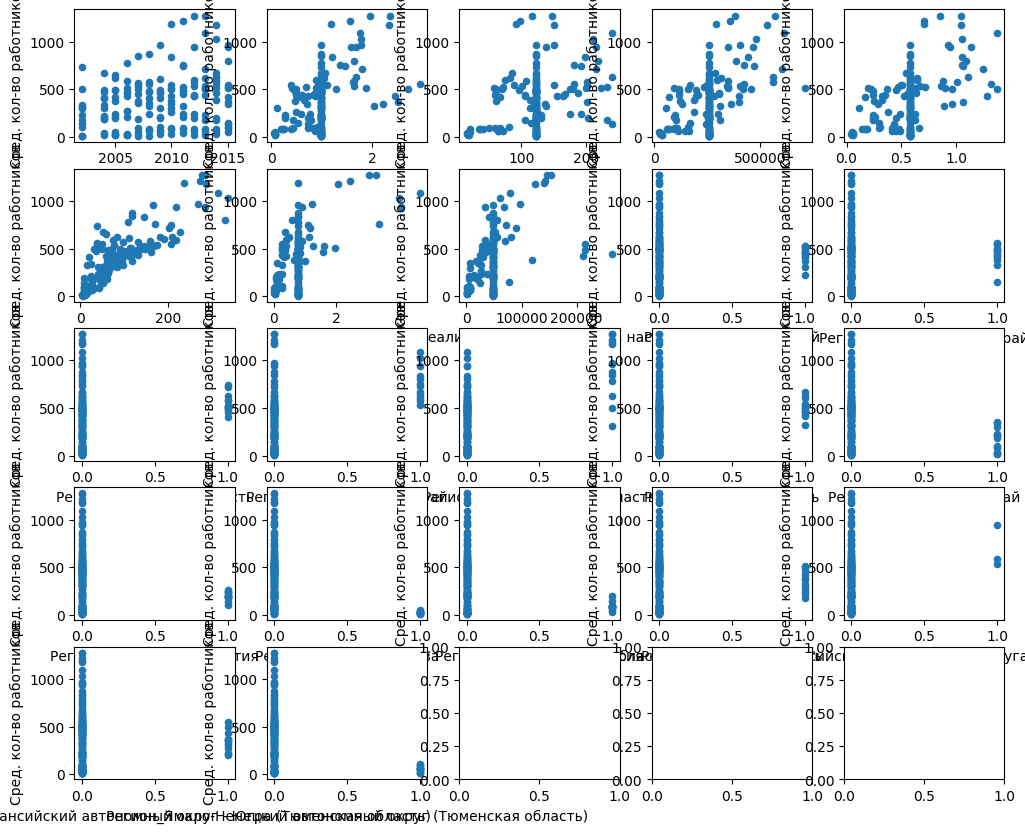

In [15]:
fig, axes = plt.subplots(nrows = 5, ncols=5, figsize=(12, 10))
for idx, feature in enumerate(df.drop(['Сред. кол-во работников'], axis=1).columns):
    df.plot(feature, 'Сред. кол-во работников', subplots=True, kind='scatter', ax=axes[idx // 5, idx % 5])

In [16]:
X = df.drop(['Сред. кол-во работников'], axis=1)
y = df['Сред. кол-во работников']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

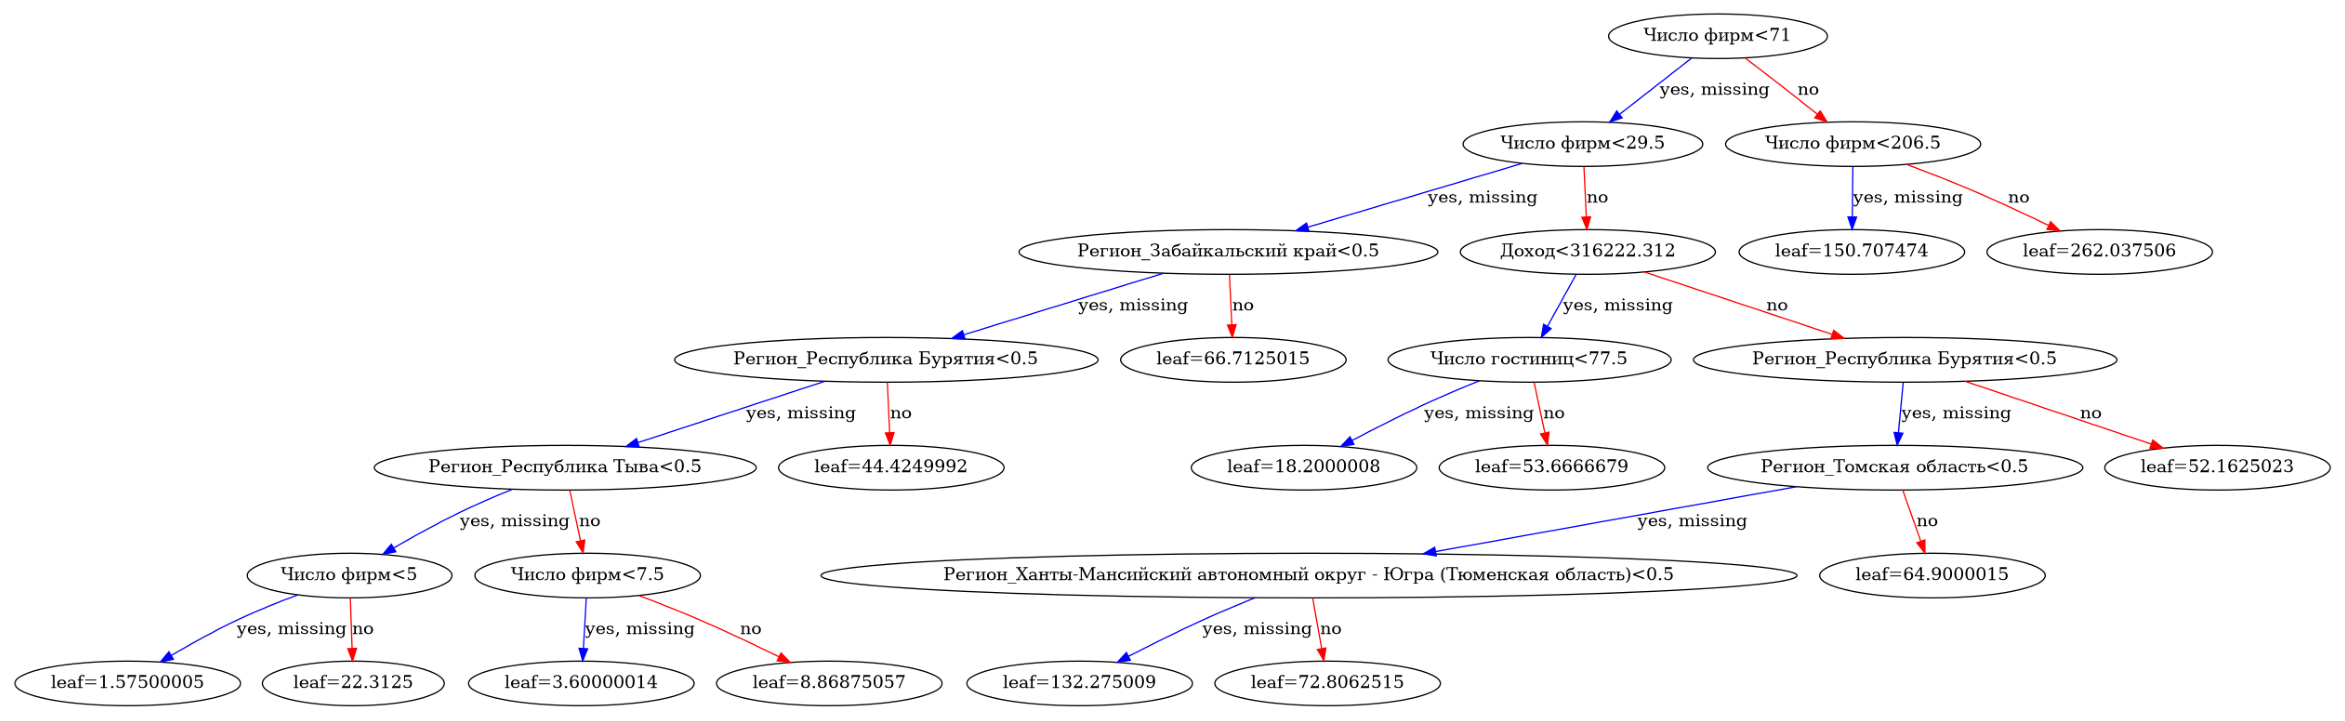

<Figure size 640x480 with 0 Axes>

In [30]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
y_pred = xgr.predict(X_test)
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgr, ax=ax)
plt.show()
plt.savefig('xgb')

In [19]:
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(xgr.score(X_test, y_test))

50.953935732160296
0.23686443925124365
0.9436877369967438


In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [21]:
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(xgr.score(X_test, y_test))

61.75172863729862
0.5728517794685805
0.9436877369967438


In [22]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [23]:
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(xgr.score(X_test, y_test))

58.35028857142858
0.3402545856046776
0.9436877369967438
